In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
from matplotlib.ticker import MaxNLocator


plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [2]:
ll = likelihood_analyser.LikelihoodAnalyser()
bandwidth = 2
decimate = 10
drive_freq = 71
fsamp = 5000
def get_scale(i,phase="sin"):
    calibrationFile = step_cal_files[i]       
    calibFreqs = np.fft.rfftfreq(len(calibrationFile.electrode_data[0]), d=1./5000)
    fft_angles = np.angle(np.fft.rfft(calibrationFile.electrode_data[0]))
    if(phase=="cos"):
        phaseResponse = (fft_angles[calibFreqs==drive_freq])%(2*np.pi)
    elif(phase=="sin"):
        phaseResponse = (fft_angles[calibFreqs==drive_freq]+np.pi/2)%(2*np.pi)

    print(phaseResponse,np.std(calibrationFile.electrode_data[0])*np.sqrt(2))

    fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': phaseResponse, 
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 
                  'limit_A': [-1, 1], 
                  'print_level': 0, 'fix_f': True, 'fix_phi': True}

    frequency = fit_kwargs['f']

    b, a = signal.butter(3, [2.*(drive_freq-bandwidth/2.)/fsamp, 2.*(drive_freq+bandwidth/2.)/fsamp ], btype = 'bandpass')
    xx2 = signal.filtfilt(b, a, calibrationFile.x2)[::decimate]
    
    m1_tmp = ll.find_mle_sin(xx2, fsamp=5000/decimate, noise_rms=1, plot=False, suppress_print=True, **fit_kwargs)
    
    return m1_tmp.values[0]

In [3]:
step_cal_dir = r'/data/new_trap/20210622/bead1/Discharge/FineDischarge/'
step_cal_files = load_dir(step_cal_dir, start_file=300)

100%|██████████| 280/280 [00:07<00:00, 38.93it/s]

580  files in folder
280  files loaded


In [4]:
dischargeAmps = []
for i in range(len(step_cal_files)):
    print(i,'/',len(step_cal_files))
    dischargeAmps.append(get_scale(i))

0 / 280
[0.08190331] 9.996283880412916
1 / 280
[0.08190909] 9.996281304225382
2 / 280
[0.08189878] 9.996281537733502
3 / 280
[0.08188683] 9.996288002004473
4 / 280
[0.08188301] 9.996283855239406
5 / 280
[0.0818812] 9.996280896041402
6 / 280
[0.08188132] 9.996280781109695
7 / 280
[0.08187602] 9.996281466488083
8 / 280
[0.08187166] 9.996283836062767
9 / 280
[0.08186824] 9.99628049649982
10 / 280
[0.08185259] 9.99628122742368
11 / 280
[0.08184229] 9.996278292760515
12 / 280
[0.08184375] 9.9962872679154
13 / 280
[0.08185011] 9.996282311106809
14 / 280
[0.08185688] 9.996282232848417
15 / 280
[0.08187448] 9.99628608262862
16 / 280
[0.0818733] 9.996285608676523
17 / 280
[0.08187297] 9.996284865507036
18 / 280
[0.08186803] 9.996282915362116
19 / 280
[0.08185791] 9.996282562713075
20 / 280
[0.08185112] 9.996280282430336
21 / 280
[0.08186028] 9.996284879184568
22 / 280
[0.08187175] 9.99628085579499
23 / 280
[0.08186014] 9.996283020975962
24 / 280
[0.08186719] 9.996287090219038
25 / 280
[0.081872

207 / 280
[0.08191724] 9.996286803289863
208 / 280
[0.08191292] 9.996282726737947
209 / 280
[0.08190771] 9.99627836823018
210 / 280
[0.08189533] 9.996286220251093
211 / 280
[0.08189578] 9.996282530728573
212 / 280
[0.08189087] 9.996279481465574
213 / 280
[0.0818991] 9.996283213603508
214 / 280
[0.08190371] 9.996283979268693
215 / 280
[0.08190964] 9.996278217408733
216 / 280
[0.08190812] 9.996281835959412
217 / 280
[0.08189192] 9.996278896802057
218 / 280
[0.08189368] 9.996275926505898
219 / 280
[0.08190671] 9.996279128442351
220 / 280
[0.08179691] 9.99627468897426
221 / 280
[0.08182042] 9.99627516703645
222 / 280
[0.08180523] 9.99627521228304
223 / 280
[0.08181146] 9.99627824130788
224 / 280
[0.08183009] 9.996278267050043
225 / 280
[0.08180829] 9.996275926682001
226 / 280
[0.08182235] 9.996279022607434
227 / 280
[0.08182145] 9.996281920292775
228 / 280
[0.08182219] 9.99628283021442
229 / 280
[0.08184658] 9.996279959458805
230 / 280
[0.08186107] 9.996278940572699
231 / 280
[0.08185479] 

In [5]:
scaleX = np.abs(np.mean(dischargeAmps[180:200]))
scaleY = scaleX*-1.0502 # from discharge values in x and y
print("Scale is ", scaleY)
dischargeVoltage = np.std(step_cal_files[-1].electrode_data[0])*np.sqrt(2)
print("voltage: ", dischargeVoltage)

Scale is  -3.542952205750171e-05
voltage:  9.996282495738035


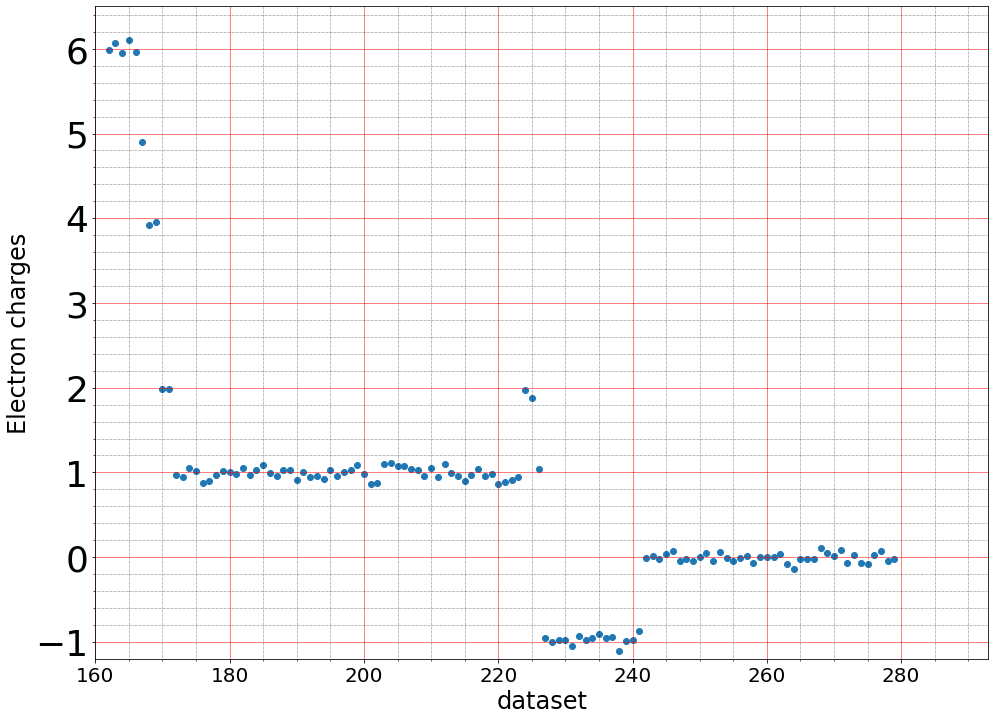

In [6]:
# amps = np.array(amps)
dischargeAmpArr = np.array(dischargeAmps)
_,ax = plt.subplots(figsize=(16,12))
# scale = 326.26

# Perrinf
ax.scatter(range(len(dischargeAmpArr)), dischargeAmpArr/scaleX, label='fit phase')
# ax.scatter(range(len(amps3)), amps3/scale, label='fit fixed-phases')

ax.set(xlabel='dataset', ylabel='Electron charges', ylim=(-1.2,6.5), xlim=(160,None))
ax.grid(axis='y')
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# ax.legend()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [7]:
def get_response_at_first(i,folder):
    phaseCalib1 = -0.0563 # where from?
    # phase_calib = -0.0442
    drive_freq1=71
    fname = folder + 'Discharge_'+str(i)+'.h5'
    if(i==1):print(fname)
    neutralityFile = BeadDataFile.BeadDataFile(fname=fname)
    fit_kwargs = {'A': 0, 'f': drive_freq1, 'phi': phaseCalib1, 
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 
                  'limit_A': [-1, 1], 
                  'print_level': 0, 'fix_f': True, 'fix_phi': True}
    
    b, a = signal.butter(3, [2.*(drive_freq1-bandwidth/2.)/fsamp, 2.*(drive_freq1+bandwidth/2.)/fsamp ], btype = 'bandpass')
    xx2 = signal.filtfilt(b, a, neutralityFile.y2)[::decimate]
    
    m1_tmp = ll.find_mle_sin(xx2, fsamp=5000/decimate, noise_rms=1, plot=False, suppress_print=True, **fit_kwargs)
    
    return m1_tmp.values[0]

In [8]:
def get_response_at_second(i,folder):
    phaseCalib2 = -0.0563+np.pi/2 # where from?
    # phase_calib = -0.0442
    drive_freq2=71*2
    fname = folder + 'Discharge_'+str(i)+'.h5'
    if(i==1):print(fname)
    neutralityFile = BeadDataFile.BeadDataFile(fname=fname)
    fit_kwargs = {'A': 0, 'f': drive_freq2, 'phi': phaseCalib2, 
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 
                  'limit_A': [-1, 1], 
                  'print_level': 0, 'fix_f': True, 'fix_phi': True}
    
    b, a = signal.butter(3, [2.*(drive_freq2-bandwidth/2.)/fsamp, 2.*(drive_freq2+bandwidth/2.)/fsamp ], btype = 'bandpass')
    xx2 = signal.filtfilt(b, a, neutralityFile.y2)[::decimate]
    
    m1_tmp = ll.find_mle_sin(xx2, fsamp=5000/decimate, noise_rms=1, plot=False, suppress_print=True, **fit_kwargs)
    
    return m1_tmp.values[0]

In [9]:
def get_voltage(folder):    
    i=0
    trekConvFactor = 200
    fname = folder + 'Discharge_'+str(i)+'.h5'
    neutralityFile = BeadDataFile.BeadDataFile(fname=fname)
    voltage0= np.std(neutralityFile.electrode_data[0])*np.sqrt(2)*trekConvFactor
    voltage1= np.std(neutralityFile.electrode_data[1])*np.sqrt(2)*trekConvFactor
    bias = np.mean(neutralityFile.electrode_data[0])*200
    print("voltages, bias: ", voltage0, voltage1, bias)
    appliedVoltage=voltage0
    return appliedVoltage

In [10]:
def compare_millicharge_full_analysis_perFile(folders,printValues=True,fileNo=2000,gap=0):
    df = pd.DataFrame()
    i=0
    for folder in folders:   
        i+=1
        appliedVoltage=get_voltage(folder)
        
        F = np.array(Parallel(n_jobs=24)(delayed(get_response_at_first)(j,folder) for j in tqdm(range(fileNo))))
        G = np.array(Parallel(n_jobs=24)(delayed(get_response_at_second)(j,folder) for j in tqdm(range(fileNo))))

        data0 = F/scaleY*dischargeVoltage/appliedVoltage
        F1=data0[::2+gap]
        F2=data0[1+gap::2+gap]

        data1 = G/scaleY*dischargeVoltage/appliedVoltage
        G1=data1[::2+gap]
        G2=data1[1+gap::2+gap]
        
        df["F1_%d" %i] = F1
        df["F2_%d" %i] = F2
        df["G1_%d" %i] = G1
        df["G2_%d" %i] = G2
        df["A_%d"  %i] =  np.add(np.multiply(F2,0.85),F1)
        df["B_%d"  %i] =  np.add(np.multiply(G2,0.85**2),G1)

        
    return df

In [11]:
folder_base = r'/data/new_trap/20210622/bead1/Neutrality2/HeightScan/'
heightRepFolder = []
for height in ["0","0_2","0_3"]:
    folder = folder_base + height + "/"
    heightRepFolder.append(folder)
print(heightRepFolder)    
resultsZeroRep = compare_millicharge_full_analysis_perFile(heightRepFolder,fileNo=500)


  0%|          | 0/500 [00:00<?, ?it/s]

['/data/new_trap/20210622/bead1/Neutrality2/HeightScan/0/', '/data/new_trap/20210622/bead1/Neutrality2/HeightScan/0_2/', '/data/new_trap/20210622/bead1/Neutrality2/HeightScan/0_3/']
voltages, bias:  50.02218118102726 0.09739696639677144 0.37715217960011277


 19%|█▉        | 96/500 [00:00<00:00, 833.81it/s]

voltages, bias:  50.02233158356098 0.0973319861504338 0.37555761795101006


 19%|█▉        | 96/500 [00:00<00:00, 532.48it/s]

voltages, bias:  50.022121850631564 0.09790282259175515 0.3697616367619655


100%|██████████| 500/500 [00:01<00:00, 330.27it/s]


In [12]:
meanZeroRep = np.mean(resultsZeroRep)
stdZeroRep = np.std(resultsZeroRep)/np.sqrt(len(resultsZeroRep))

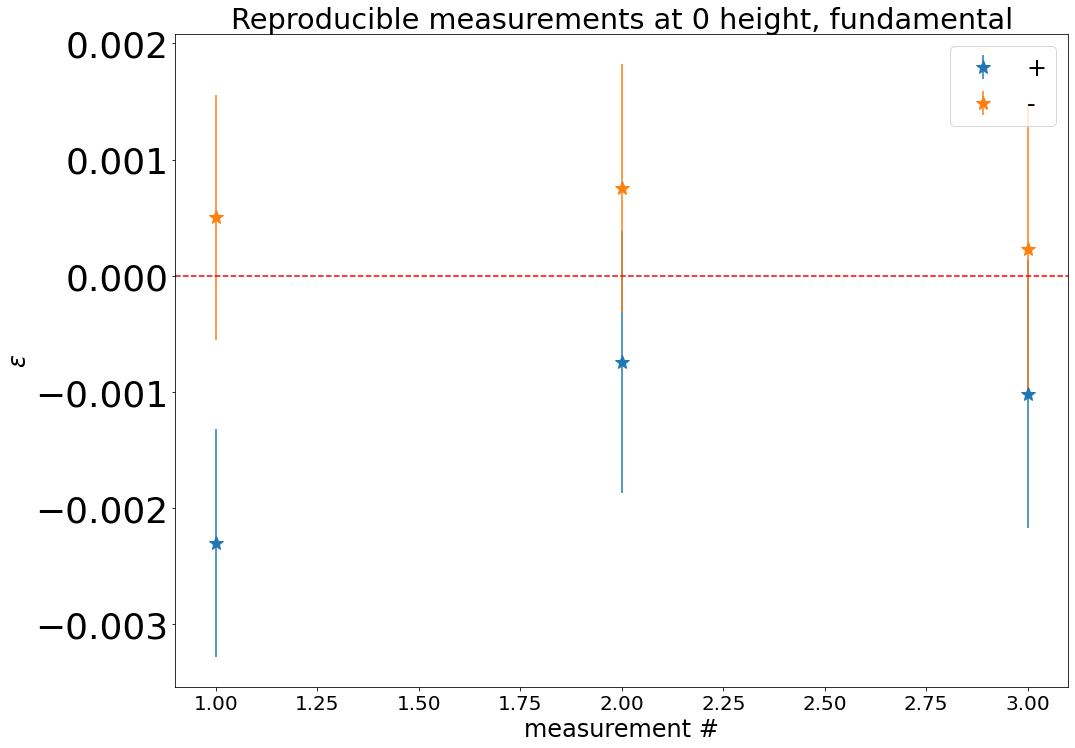

In [13]:
x=np.arange(1,4)
plt.errorbar(x,meanZeroRep[::6],yerr=stdZeroRep[::6],linestyle="",marker="*",markersize=15,label="+")
plt.errorbar(x,meanZeroRep[1::6],yerr=stdZeroRep[1::6],linestyle="",marker="*",markersize=15,label="-")
plt.title("Reproducible measurements at 0 height, fundamental")
plt.ylabel(r"$\epsilon$")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("measurement #")
plt.legend()
plt.show()

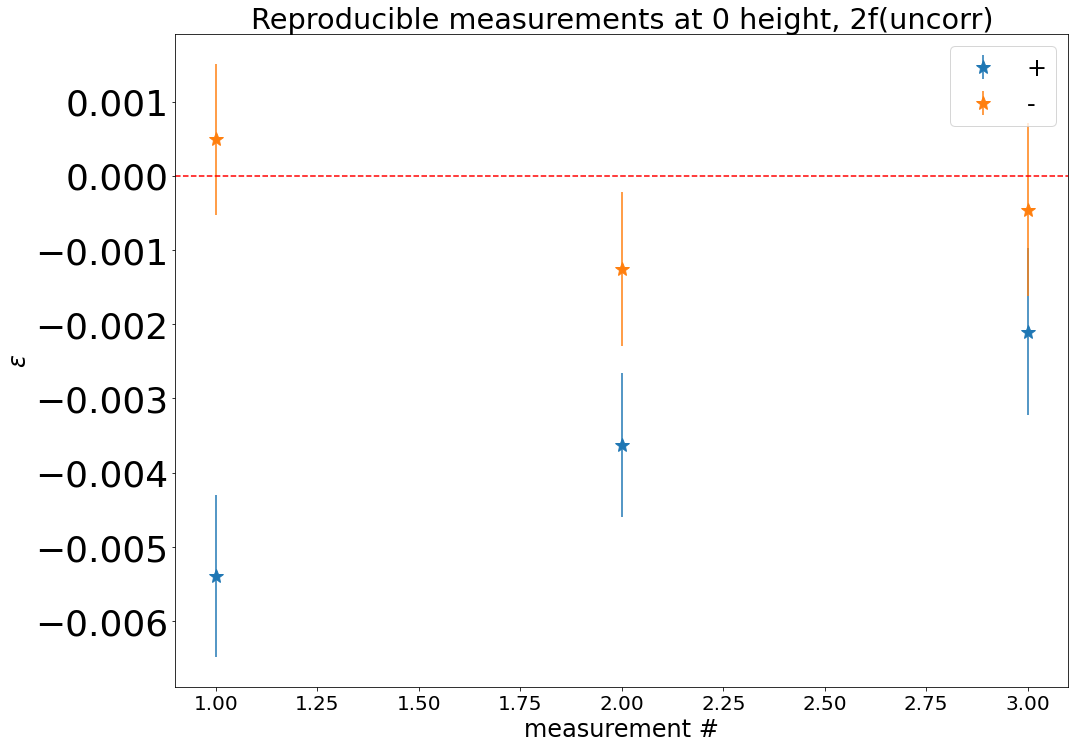

In [14]:
x=np.arange(1,4)
plt.errorbar(x,meanZeroRep[2::6],yerr=stdZeroRep[2::6],linestyle="",marker="*",markersize=15,label="+")
plt.errorbar(x,meanZeroRep[3::6],yerr=stdZeroRep[3::6],linestyle="",marker="*",markersize=15,label="-")
plt.title("Reproducible measurements at 0 height, 2f(uncorr)")
plt.ylabel(r"$\epsilon$")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("measurement #")

plt.legend()

plt.show()

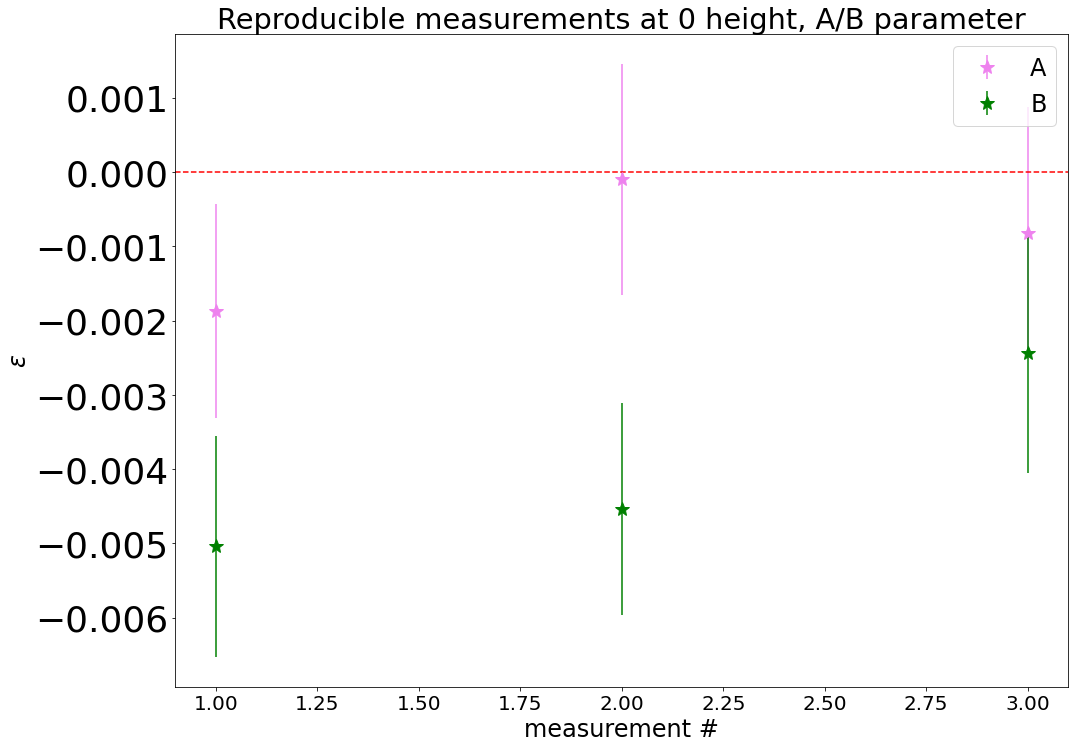

In [32]:
x=np.arange(1,4)

yerr=  [np.sqrt(stdZeroRep[i]**2+stdZeroRep[i+1]**2) for i in np.arange(0,len(stdZeroRep),6)]
yerr2=  [np.sqrt(stdZeroRep[i]**2+stdZeroRep[i+1]**2) for i in np.arange(2,len(stdZeroRep),6)]

plt.errorbar(x,meanZeroRep[4::6],yerr=yerr,linestyle="",marker="*",markersize=15,label="A",color="violet")
plt.errorbar(x,meanZeroRep[5::6],yerr=yerr2,linestyle="",marker="*",markersize=15,label="B",color="green")

plt.title("Reproducible measurements at 0 height, A/B parameter")
plt.ylabel(r"$\epsilon$")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("measurement #")

plt.legend()
plt.show()

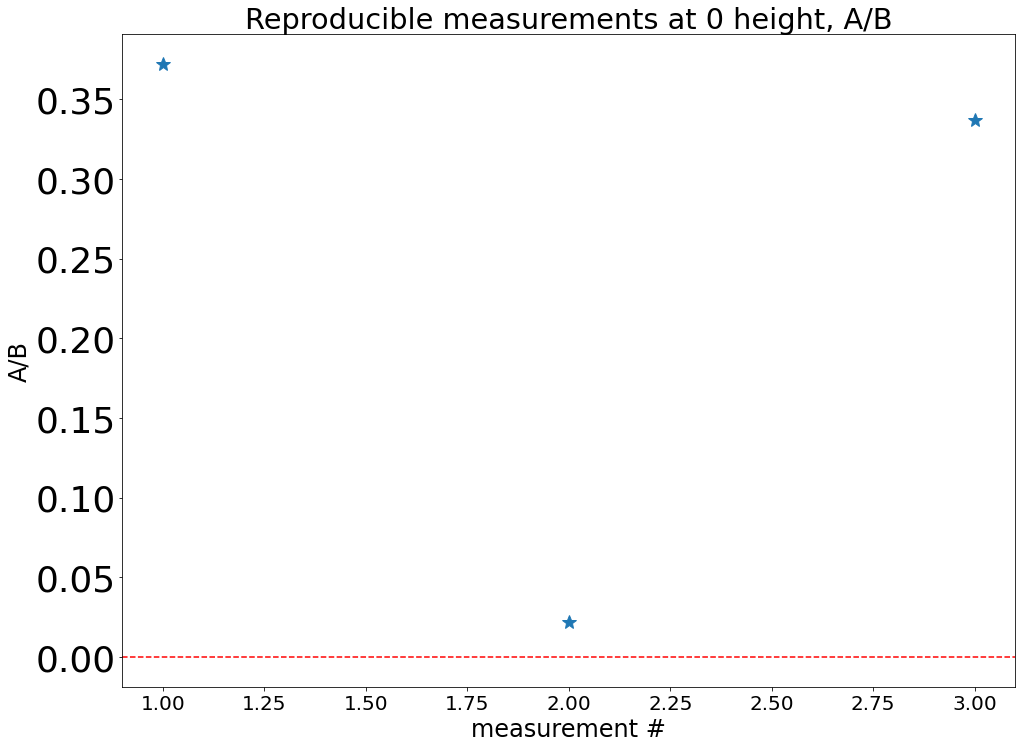

In [16]:
x=np.arange(1,4)
AoverB = [meanZeroRep[i+4]/meanZeroRep[i+5] for i in range(0,len(meanZeroRep),6)]

plt.plot(x,AoverB,linestyle="",marker="*",markersize=15,label="-")
plt.title("Reproducible measurements at 0 height, A/B")
plt.ylabel(r"A/B")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("measurement #")

plt.show()

In [17]:
folder_base = r'/data/new_trap/20210622/bead1/Neutrality2/HeightScan/'
heightRepFolder = []
heights = [-7.5,-6,-4.5,-3,-1.5,1.5,3,4.5,6,7.5]
for height in heights:
    if(height<0):
        height = "m"+str(np.abs(height))
    folder = folder_base + str(height) + "/"
    heightRepFolder.append(folder)
print(heightRepFolder)    
resultsHeightRep = compare_millicharge_full_analysis_perFile(heightRepFolder,fileNo=504)


  0%|          | 0/504 [00:00<?, ?it/s]

['/data/new_trap/20210622/bead1/Neutrality2/HeightScan/m7.5/', '/data/new_trap/20210622/bead1/Neutrality2/HeightScan/m6/', '/data/new_trap/20210622/bead1/Neutrality2/HeightScan/m4.5/', '/data/new_trap/20210622/bead1/Neutrality2/HeightScan/m3/', '/data/new_trap/20210622/bead1/Neutrality2/HeightScan/m1.5/', '/data/new_trap/20210622/bead1/Neutrality2/HeightScan/1.5/', '/data/new_trap/20210622/bead1/Neutrality2/HeightScan/3/', '/data/new_trap/20210622/bead1/Neutrality2/HeightScan/4.5/', '/data/new_trap/20210622/bead1/Neutrality2/HeightScan/6/', '/data/new_trap/20210622/bead1/Neutrality2/HeightScan/7.5/']
voltages, bias:  50.022328246160306 0.0972265242750088 0.3736053004026588


  0%|          | 0/504 [00:00<?, ?it/s]

voltages, bias:  50.02222478848104 0.09776337036516201 0.3756449910623891


  0%|          | 0/504 [00:00<?, ?it/s]

voltages, bias:  50.02184718459609 0.09822486415393308 0.3738525476701283


  0%|          | 0/504 [00:00<?, ?it/s]

voltages, bias:  50.02200948150695 0.09799783557119728 0.37684445568595953


  0%|          | 0/504 [00:00<?, ?it/s]

voltages, bias:  50.02182509731262 0.09805759699787193 0.37584587216527265


  0%|          | 0/504 [00:00<?, ?it/s]

voltages, bias:  50.02199289045173 0.09868650059681632 0.3742113335668299


  0%|          | 0/504 [00:00<?, ?it/s]

voltages, bias:  50.021844276759374 0.09803603625790439 0.37164575391857274


  0%|          | 0/504 [00:00<?, ?it/s]

voltages, bias:  50.02202989480266 0.09767872594493539 0.37089914721095035


  0%|          | 0/504 [00:00<?, ?it/s]

voltages, bias:  50.021697122875544 0.09790240204150201 0.36892451810700866


  0%|          | 0/504 [00:00<?, ?it/s]

voltages, bias:  50.02204611913885 0.09774926333296827 0.3677125275338146


100%|██████████| 504/504 [00:00<00:00, 1138.13it/s]


In [18]:
meanHeightRep = np.mean(resultsHeightRep)
stdHeightRep = np.std(resultsHeightRep)/np.sqrt(len(resultsHeightRep))

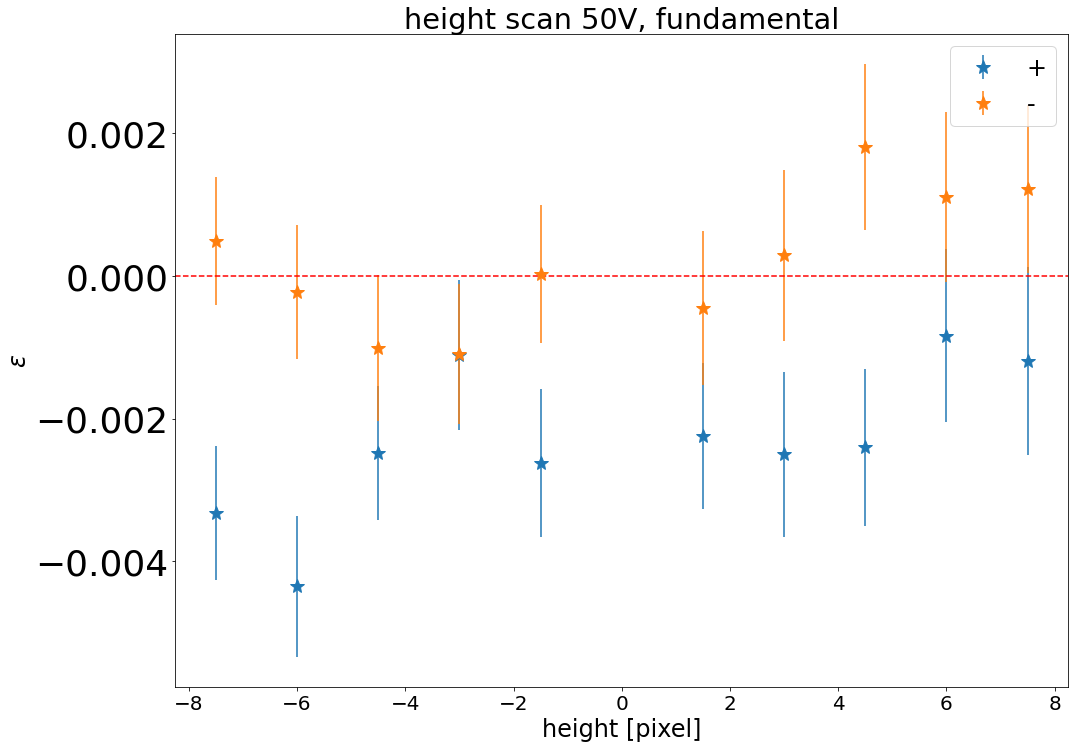

In [19]:
x=heights
plt.errorbar(heights,meanHeightRep[::6],yerr=stdHeightRep[::6],linestyle="",marker="*",markersize=15,label="+")
plt.errorbar(heights,meanHeightRep[1::6],yerr=stdHeightRep[1::6],linestyle="",marker="*",markersize=15,label="-")
plt.title("height scan 50V, fundamental")
plt.ylabel(r"$\epsilon$")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("height [pixel]")

plt.legend()
plt.show()

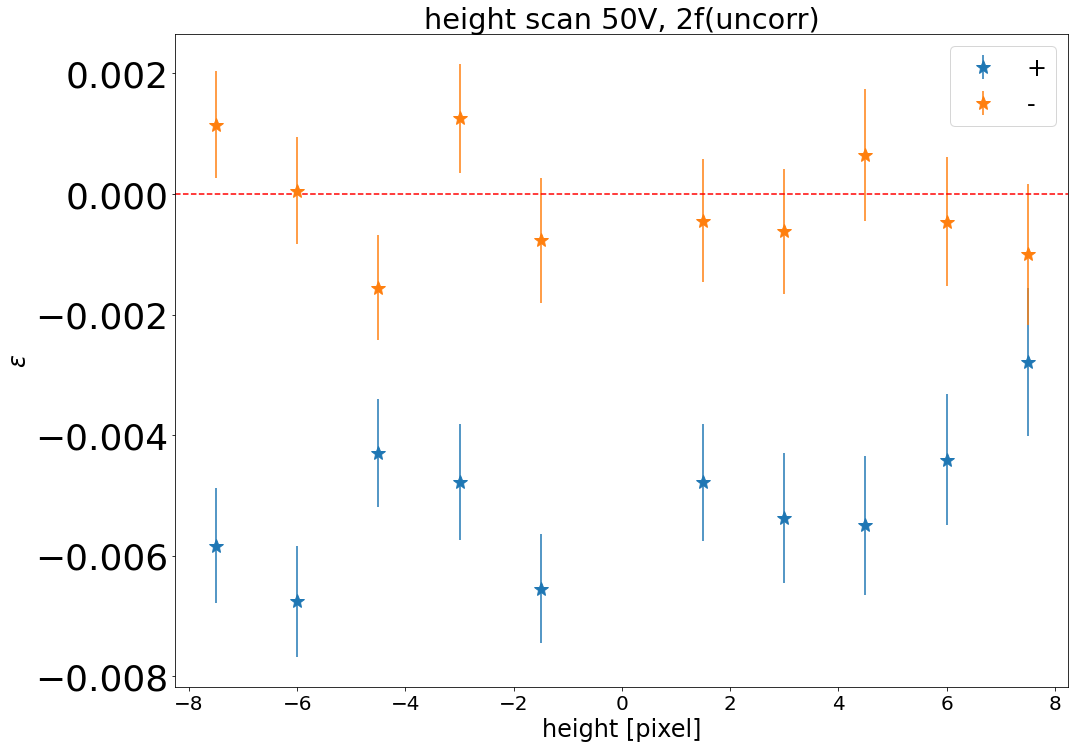

In [20]:
x=heights
plt.errorbar(x,meanHeightRep[2::6],yerr=stdHeightRep[2::6],linestyle="",marker="*",markersize=15,label="+")
plt.errorbar(x,meanHeightRep[3::6],yerr=stdHeightRep[3::6],linestyle="",marker="*",markersize=15,label="-")
plt.title("height scan 50V, 2f(uncorr)")
plt.ylabel(r"$\epsilon$")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("height [pixel]")
plt.legend()
plt.show()

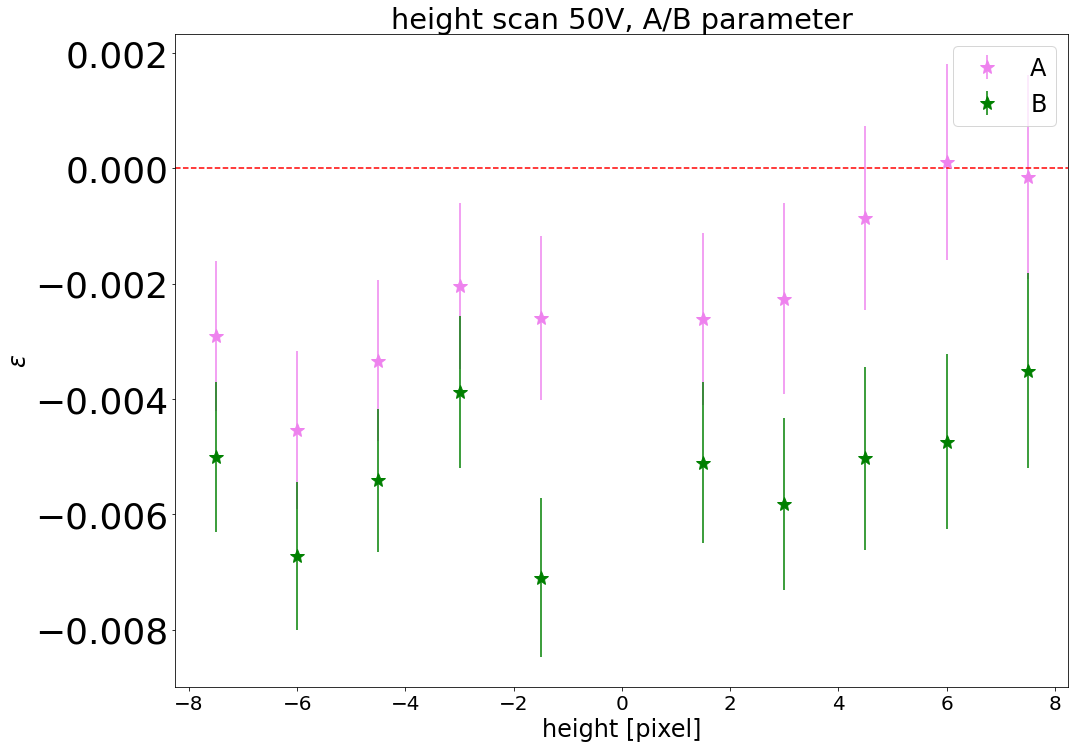

In [35]:
#heights = [-7.5,-6,-4.5,-3,-1.5,1.5,3,4.5,6,7.5]
x= heights
yerr=  [np.sqrt(stdHeightRep[i]**2+stdHeightRep[i+1]**2) for i in np.arange(0,len(stdHeightRep),6)]
yerr2=  [np.sqrt(stdHeightRep[i]**2+stdHeightRep[i+1]**2) for i in np.arange(2,len(stdHeightRep),6)]

plt.errorbar(x,meanHeightRep[4::6],yerr=yerr,linestyle="",marker="*",markersize=15,label="A",color="violet")
plt.errorbar(x,meanHeightRep[5::6],yerr=yerr2,linestyle="",marker="*",markersize=15,label="B",color="green")

plt.title("height scan 50V, A/B parameter")
plt.ylabel(r"$\epsilon$")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("height [pixel]")
plt.legend()
plt.show()

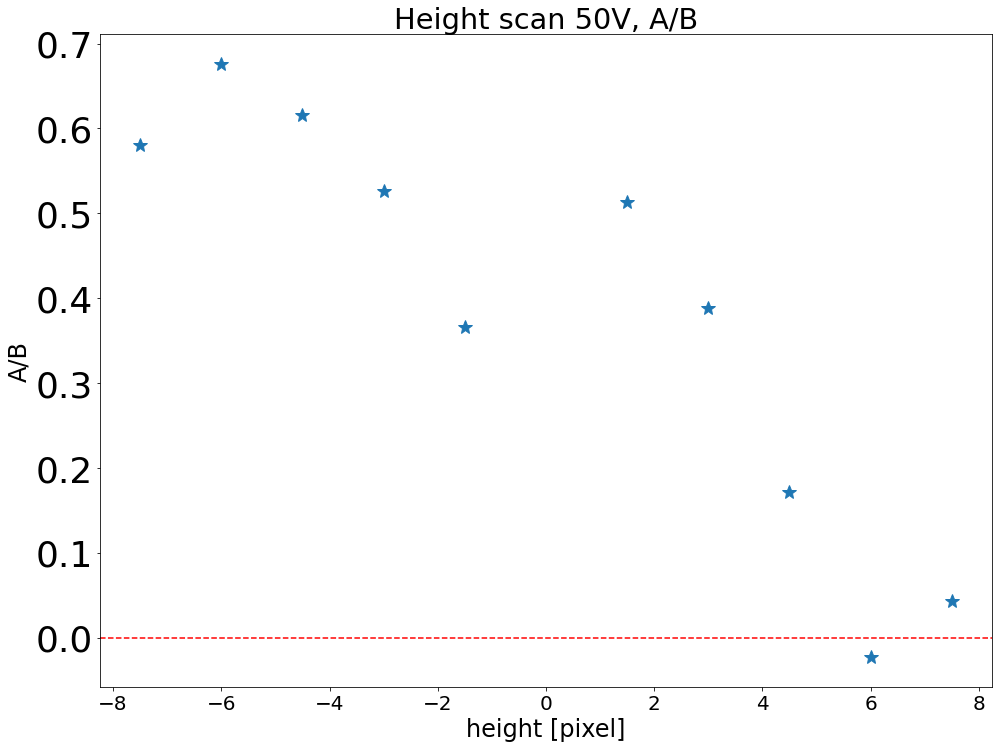

In [22]:
x=heights
AoverB = [meanHeightRep[i+4]/meanHeightRep[i+5] for i in range(0,len(meanHeightRep),6)]

plt.plot(x,AoverB,linestyle="",marker="*",markersize=15,label="-")
plt.title("Height scan 50V, A/B")
plt.ylabel(r"A/B")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("height [pixel]")

plt.show()

In [23]:
folder_base = r'/data/new_trap/20210622/bead1/Neutrality2/HeightScan200V/'
heightRepFolder = []
heights = [-6,-4,-2,2,4,6]
for height in heights:
    if(height<0):
        height = "m"+str(np.abs(height))
    folder = folder_base + str(height) + "/"
    heightRepFolder.append(folder)
print(heightRepFolder)    
resultsHeightRep200 =  compare_millicharge_full_analysis_perFile(heightRepFolder,fileNo=504)


  0%|          | 0/504 [00:00<?, ?it/s]

['/data/new_trap/20210622/bead1/Neutrality2/HeightScan200V/m6/', '/data/new_trap/20210622/bead1/Neutrality2/HeightScan200V/m4/', '/data/new_trap/20210622/bead1/Neutrality2/HeightScan200V/m2/', '/data/new_trap/20210622/bead1/Neutrality2/HeightScan200V/2/', '/data/new_trap/20210622/bead1/Neutrality2/HeightScan200V/4/', '/data/new_trap/20210622/bead1/Neutrality2/HeightScan200V/6/']
voltages, bias:  200.04629100411617 0.09824243019864592 0.36959877896771093


 19%|█▉        | 96/504 [00:00<00:00, 805.90it/s]

voltages, bias:  200.04543362003787 0.0985432075003312 0.3715096115640525


 19%|█▉        | 96/504 [00:00<00:00, 953.22it/s]

voltages, bias:  200.04542398903297 0.09800473849507921 0.3703876226264041


 19%|█▉        | 96/504 [00:00<00:00, 905.02it/s]

voltages, bias:  200.04755314182455 0.09740775828073676 0.37249525443896314


 29%|██▊       | 144/504 [00:00<00:00, 842.25it/s]

voltages, bias:  200.04703412197858 0.09769848986032122 0.37215098019313864


 19%|█▉        | 96/504 [00:00<00:00, 801.11it/s]

voltages, bias:  200.04413442349315 0.09827142804900958 0.36765298554311654


100%|██████████| 504/504 [00:00<00:00, 1052.34it/s]


In [24]:
meanHeightRep200 = np.mean(resultsHeightRep200)
stdHeightRep200 = np.std(resultsHeightRep200)/np.sqrt(len(resultsHeightRep200))

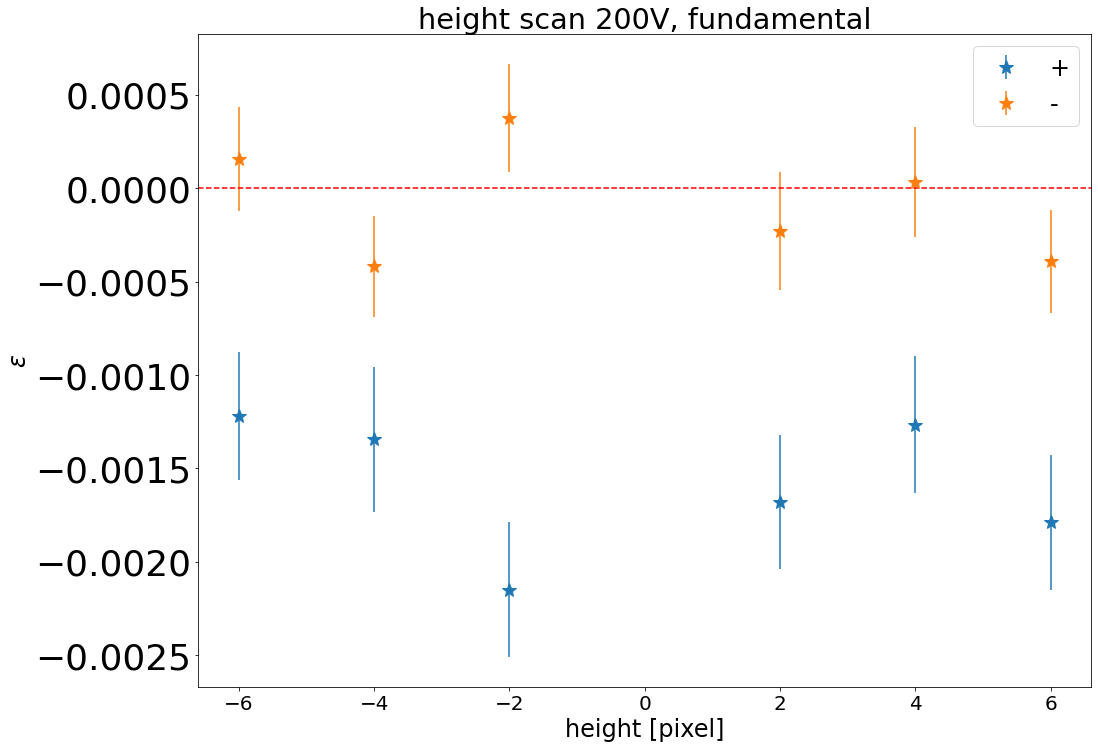

In [25]:
x=heights
plt.errorbar(heights,meanHeightRep200[::6],yerr=stdHeightRep200[::6],linestyle="",marker="*",markersize=15,label="+")
plt.errorbar(heights,meanHeightRep200[1::6],yerr=stdHeightRep200[1::6],linestyle="",marker="*",markersize=15,label="-")
plt.title("height scan 200V, fundamental")
plt.ylabel(r"$\epsilon$")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("height [pixel]")

plt.legend()
plt.show()

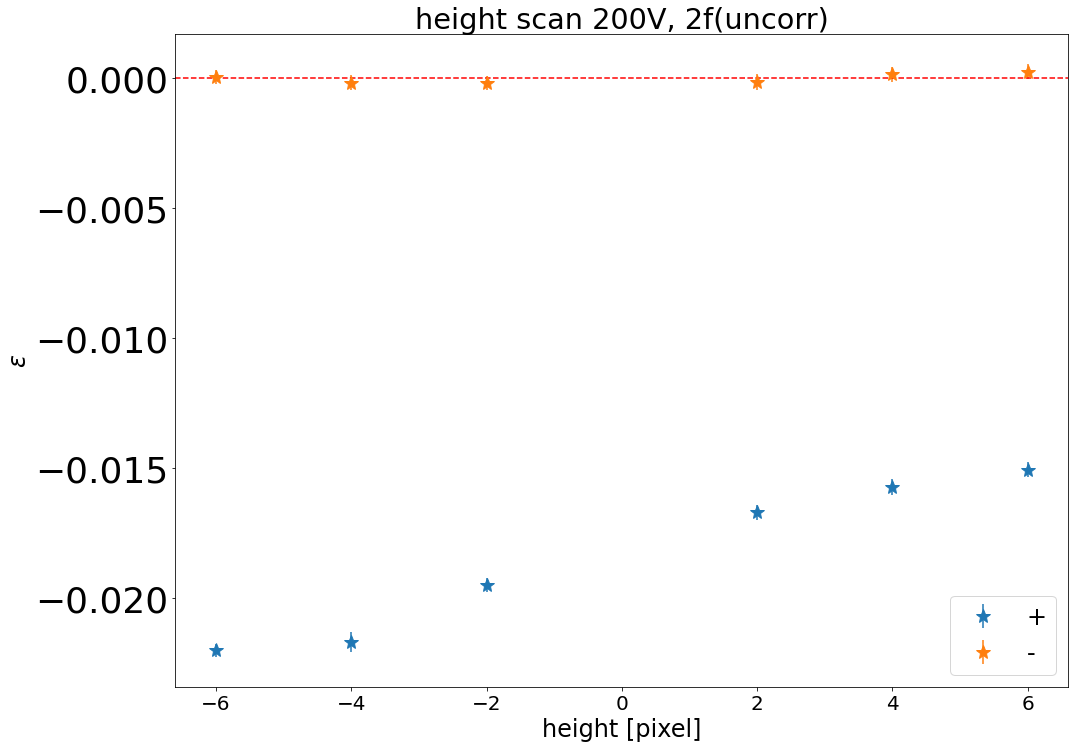

In [26]:
x=heights
plt.errorbar(x,meanHeightRep200[2::6],yerr=stdHeightRep200[2::6],linestyle="",marker="*",markersize=15,label="+")
plt.errorbar(x,meanHeightRep200[3::6],yerr=stdHeightRep200[3::6],linestyle="",marker="*",markersize=15,label="-")
plt.title("height scan 200V, 2f(uncorr)")
plt.ylabel(r"$\epsilon$")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("height [pixel]")

plt.legend()

plt.show()

In [27]:
np.arange(0,18,6)


array([ 0,  6, 12])

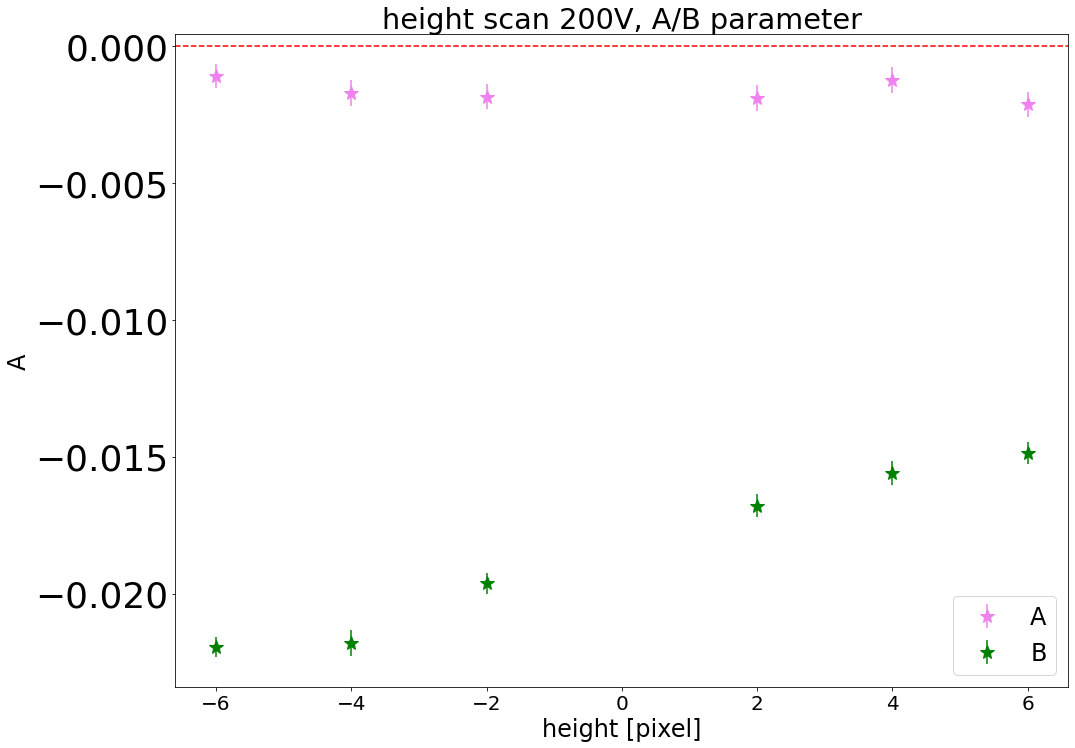

In [28]:
x=heights

yerr=  [np.sqrt(stdHeightRep200[i]**2+stdHeightRep200[i+1]**2) for i in np.arange(0,len(stdHeightRep200),6)]
yerr2=  [np.sqrt(stdHeightRep200[i]**2+stdHeightRep200[i+1]**2) for i in np.arange(2,len(stdHeightRep200),6)]

plt.errorbar(x,meanHeightRep200[4::6],yerr=yerr,linestyle="",marker="*",markersize=15,label="A",color="violet")
plt.errorbar(x,meanHeightRep200[5::6],yerr=yerr2,linestyle="",marker="*",markersize=15,label="B",color="green")

plt.title("height scan 200V, A/B parameter")
plt.ylabel(r"A")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("height [pixel]")
plt.legend()
plt.show()

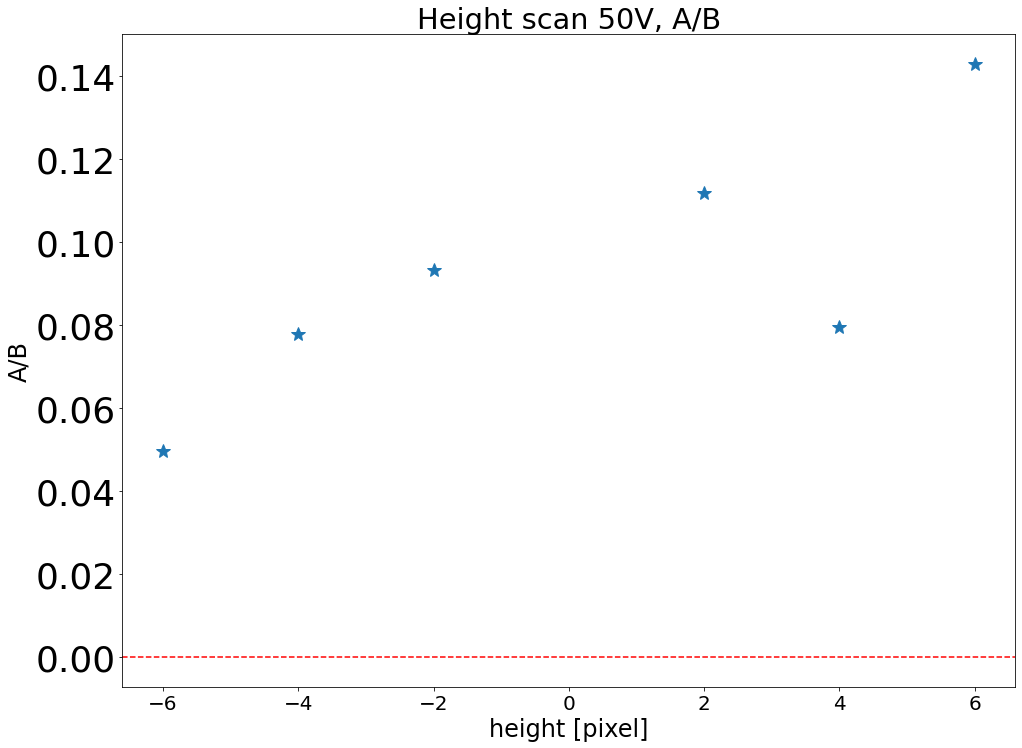

In [29]:
x=heights
AoverB = [meanHeightRep200[i+4]/meanHeightRep200[i+5] for i in range(0,len(meanHeightRep200),6)]

plt.plot(x,AoverB,linestyle="",marker="*",markersize=15,label="-")
plt.title("Height scan 50V, A/B")
plt.ylabel(r"A/B")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("height [pixel]")

plt.show()

In [30]:
def compare_millicharge(folders,printValues=True,extendedData=False,fileNo=1000):
    dataDiffList = []
    dataBasicList= []
    for folder in folders:
        appliedVoltage=get_voltage(folder)
        ampsNeutralityData0 = np.array(Parallel(n_jobs=24)(delayed(get_response_at_first)(i,folder) for i in tqdm(range(fileNo))))
        data0 = ampsNeutralityData0/scaleY*dischargeVoltage/appliedVoltage
        data0Plus=data0[::2]
        data0Minus=data0[1::2]

        data0PlusMean=np.mean(data0Plus)
        data0MinusMean=np.mean(data0Minus)
        data0PlusStd= np.std(data0Plus)/np.sqrt(len(data0Plus))
        data0MinusStd=np.std(data0Minus)/np.sqrt(len(data0Minus))

        data0Diff=np.mean(data0Minus)*0.85+np.mean(data0Plus)
        
        if(printValues==True):
            print(folder)
            print('mean+: ',data0PlusMean , 'std: ',data0PlusStd)
            print('mean-: ',data0MinusMean , 'std: ',data0MinusStd )
            print("A:",data0Diff)
            print(r"A/$\Delta_\epsilon$ (+,-):", data0Diff/data0PlusStd, data0Diff/data0MinusStd)            
        dataDiffList.append([data0Diff,data0Diff/data0PlusStd,data0Diff/data0MinusStd])
        dataBasicList.append([data0PlusMean,data0MinusMean,data0PlusStd,data0MinusStd])
    return dataBasicList,dataDiffList

In [31]:
def compare_millicharge_AB(folders,printValues=True,extendedData=False,fileNo=1000):
    dataDiffList = []
    for folder in folders:
        appliedVoltage=get_voltage(folder)
        F = np.array(Parallel(n_jobs=24)(delayed(get_response_at_first)(i,folder) for i in tqdm(range(fileNo))))
        G = np.array(Parallel(n_jobs=24)(delayed(get_response_at_second)(i,folder) for i in tqdm(range(fileNo))))

        data0 = F/scaleY*dischargeVoltage/appliedVoltage
        F1=data0[::2]
        F2=data0[1::2]
        
        
        data1 = G/scaleY*dischargeVoltage/appliedVoltage
        G1=data1[::2]
        G2=data1[1::2]

        data0PlusMean=np.mean(F1)
        data0MinusMean=np.mean(F2)
        data0PlusStd= np.std(F1)/np.sqrt(len(F1))
        data0MinusStd=np.std(F2)/np.sqrt(len(F2))
    
        A=data0MinusMean*0.85+data0PlusMean
        
        data1PlusMean=np.mean(G1)
        data1MinusMean=np.mean(G2)
        data1PlusStd= np.std(G1)/np.sqrt(len(G1))
        data1MinusStd=np.std(G2)/np.sqrt(len(G2))
    
        B=data1MinusMean*0.85**2+data1PlusMean
    
    
        if(printValues==True):
            print(folder)
            print('mean: ',data0PlusMean , 'std: ',data0PlusStd)
            print('mean: ',data0MinusMean , 'std: ',data0MinusStd )
            print('mean: ',data1PlusMean , 'std: ',data1PlusStd)
            print('mean: ',data1MinusMean , 'std: ',data1MinusStd )
            print("A:",A , "B:",B)
            print("dev in std (A,B):", A/np.sqrt(data0PlusStd**2+data0MinusStd**2),  B/np.sqrt(data1PlusStd**2+data1MinusStd**2))            
        dataDiffList.append(A/B)
        
    return dataDiffList